In [1]:
from cobra.io import read_sbml_model

nj4 = read_sbml_model("GEMs/NJ4_curated.xml")
m5 = read_sbml_model("GEMs/M5_curated.xml")

## static sim

look into the possibilities for crossfeeding

## dynamic sim

In [27]:
import pandas as pd

media_db = pd.read_csv("medium.tsv", sep="\t")

m5_med = media_db[media_db["medium"] == "m5_med"]

UNLIMITED_METABOLITES = ['ca2_e', 'cl_e', 'cobalt2_e', 'cu2_e', 'fe2_e', 'fe3_e','h_e', 'k_e', 'h2o_e', 'mg2_e', 
                    'mn2_e', 'mobd_e', 'na1_e', 'nh4_e', 'ni2_e', 'pi_e', 'so4_e', 'zn2_e']

medium = [str(m+"_e") for m in m5_med["compound"].tolist()]
added_metabilotes = set(medium) - set(UNLIMITED_METABOLITES)
added_metabilotes = {k:0.5 for k in added_metabilotes}

# TODO: calculate xylan (60 g/L concentration) to an amount of moles that makes sense
added_metabilotes["xylan4_e"] = 10
added_metabilotes["xylan8_e"] = 10

In [32]:
sim = mult_strain(models=[nj4, m5], medium=added_metabilotes, sim_time=40, specific_initial_pop={"NJ4":0.02, "M5": 0.01})


Running COMETS simulation ...
Done!


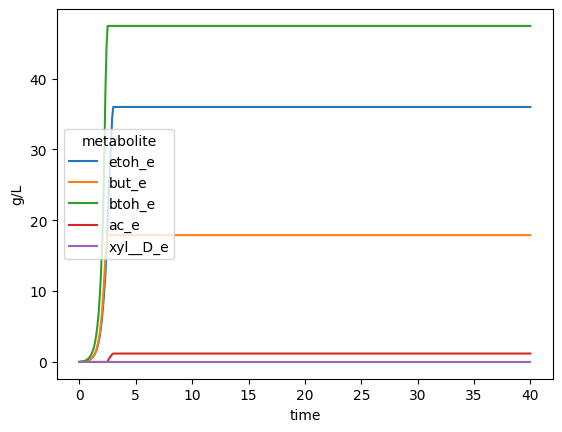

In [29]:
import seaborn as sns
from utils.comets_functions import plot_metabolites, plot_biomass, plot_reaction_flux

metabolites = ["xyl__D_e", "etoh_e", "but_e", "btoh_e", "ac_e"] #, "xylan4_e"]

plot_metabolites(sim, metabolites)

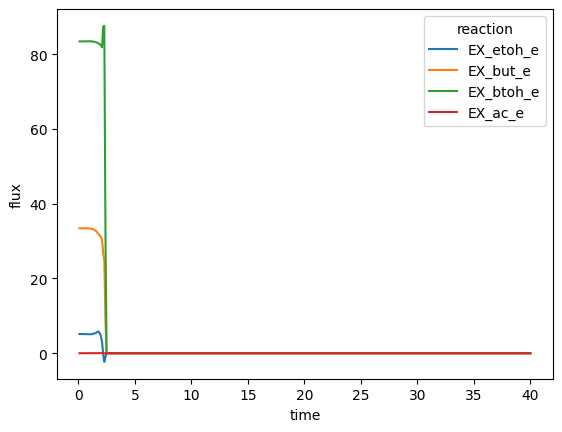

In [18]:
production_reactions = ["EX_etoh_e", "EX_but_e", "EX_btoh_e", "EX_ac_e"]

plot_reaction_flux(sim, production_reactions, "M5")

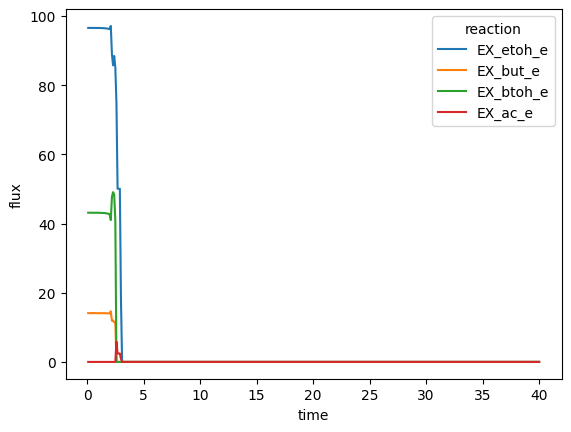

In [19]:
production_reactions = ["EX_etoh_e", "EX_but_e", "EX_btoh_e", "EX_ac_e"]

plot_reaction_flux(sim, production_reactions, "NJ4")

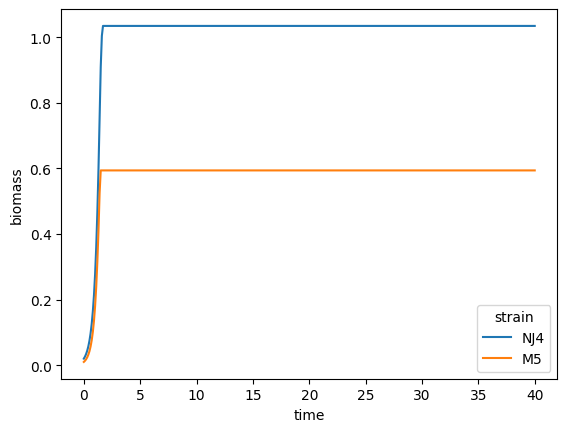

In [33]:
plot_biomass(sim)

In [40]:
m = sim.get_metabolite_time_series().iloc[-1, 2:]

In [47]:
# get a dictionary from m with the metabolite names as keys and the final concentrations as values
m2 = {k:v for k,v in m.items() if v > 0.0}

In [49]:
len(m2)

61